# Project_Ideas

In [1]:
import numpy as np
import pandas as pd
import altair as alt
from vega_datasets import data

In [4]:
shooting = pd.read_csv('fatal-police-shootings-data (1).csv')
#pd.options.display.max_columns = None
shooting.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [5]:
def clean_armed(string):

    if string in ['Airsoft pistol', 'bean-bag gun', 'BB gun', 'air pistol', 'pellet gun',
                 'BB gun and vehicle']:
        return 'toy gun and weapon'

    elif string in ['vehicle and gun', 'gun and car']:
        return 'gun and vehicle'
    
    elif string in ['vehicle and machete', 'car, knife, and mace']:
        return 'sharp object and vehicle'
    
    elif string in ['metal object', 'unknown weapon', 'carjack','claimed to be armed']:
        return 'undetermined'
    
    elif string == 'motorcycle':
        return 'vehicle'
    
    elif string in ['gun and knife', 'hatchet and gun', 'machete and gun', 'gun and sword', 'gun and machete']:
        return 'gun and sharp object'
    
    elif string in ['baseball bat and fireplace poker', 'pole and knife', 'baseball bat and bottle', 'baseball bat and knife']:
        return 'sharp and blunt weapons'
    
    elif string in ['Taser', 'bow and arrow', 'crossbow', 'pepper spray', 'wasp spray']:
        return 'non-firearm ranged weapon'
    
    elif string in ['guns and explosives', 'hand torch', 'fireworks', 'incendiary device', 'grenade']:
        return 'incendiary device'
    
    elif string in ['knife', 'hatchet', 'sword', 'machete', 'box cutter', 'screwdriver', 'lawn mower blade', 'cordless drill', 'metal hand tool', 'sharp object', 'meat cleaver',
                   'straight edge razor', 'ax', 'chain saw', 'scissors', 'spear', 'pitchfork', 'bayonet', 'glass shard', 'metal rake', 'beer bottle', 'pen', 'chainsaw', 'samurai sword',
                   'ice pick', 'bottle', 'nail gun', 'stapler', 'pick-axe','railroad spikes']:
        return 'sharp object'
    
    elif string in ['hammer', 'flagpole', 'metal pole', 'metal pipe', 'blunt object', 'metal stick', "contractor's level", 'brick', 'baseball bat', 'garden tool', 'pole',
                    'flashlight', 'chair', 'rock', 'piece of wood', 'baton', 'crowbar', 'oar', 'pipe', 'wrench', 'walking stick', 'barstool', 'tire iron', 'air conditioner']:
        return 'blunt object'
    
    elif string in ['chain','binoculars','microphone']:
        return 'others'
    else:
        return string
shooting['armed'] = shooting['armed'].apply(clean_armed)
shooting.armed = shooting.armed.fillna('missing')

In [6]:
armed_type = shooting.groupby('armed').count()['id'].sort_values(ascending = False).head(8).index
shooting.armed = shooting.armed.apply(lambda x: x if x in armed_type else 'others')
shooting.race = shooting.race.replace({'A':'Asian', 'W':'White','H':'Hispanic','B':'black',\
                                      'O':'Other','N':'Native American'}).fillna('unknown')
shooting.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,sharp object,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [7]:
heat_source = shooting.groupby(['race','armed'],as_index = False)['id'].count()
heat_source = heat_source.rename(columns={'id':'count'})

In [8]:
heat_source

,race,armed,count
0,Asian,blunt object,3
1,Asian,gun,40
2,Asian,missing,3
3,Asian,others,4
4,Asian,sharp object,36
...,...,...,...
56,unknown,sharp object,89
57,unknown,toy weapon,13
58,unknown,unarmed,5
59,unknown,undetermined,51


In [9]:
alt.Chart(heat_source).mark_rect().encode(
    x='race:O',
    y='armed:O',
    color='count:Q',
    tooltip=['race', 'armed','count']
)

alt.Chart(...)

In [10]:
race_count = shooting.groupby('race').count()['id']

In [11]:
normal = heat_source.assign(percentage = heat_source['count']/race_count[heat_source['race']].values)

In [12]:
normal

,race,armed,count,percentage
0,Asian,blunt object,3,0.028846
1,Asian,gun,40,0.384615
2,Asian,missing,3,0.028846
3,Asian,others,4,0.038462
4,Asian,sharp object,36,0.346154
...,...,...,...,...
56,unknown,sharp object,89,0.163904
57,unknown,toy weapon,13,0.023941
58,unknown,unarmed,5,0.009208
59,unknown,undetermined,51,0.093923


In [13]:
make = pd.DataFrame({'armed': normal.armed.unique()})
selection = alt.selection_multi(fields=['armed'])
color = alt.condition(selection,
                    alt.Color('armed:N'),#),
                    alt.value('lightgray'))

make_selector = alt.Chart(make).mark_rect().encode(y='armed', 
                                                   color=color).add_selection(selection)

shishi = alt.Chart(normal).mark_bar().encode(
    x='race',
    y= 'percentage',
    color=color,
).transform_filter(selection).properties(
    width=300,
    height=300
).interactive()

make_selector | shishi

alt.HConcatChart(...)

In [18]:
# data cleaning
state_id = pd.read_csv('us-state-ansi-fips.csv').rename(columns = {' st':'st',' stusps':'stusps'})
state_id['stusps'] = state_id['stusps'].apply(lambda x: x[1::])
state_id.head()

,stname,st,stusps
0,Alabama,1,AL
1,Alaska,2,AK
2,Arizona,4,AZ
3,Arkansas,5,AR
4,California,6,CA


In [19]:
shooting.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,sharp object,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [20]:
shooting_with_state_id = shooting.merge(state_id,left_on = 'state', right_on = 'stusps',how = 'left')
shooting_with_state_id['year'] = shooting_with_state_id['date'].apply(lambda x: x.split('-')[0])#.astype('int')
shooting_with_state_id.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,stname,st,stusps,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,...,attack,Not fleeing,False,-123.122,47.247,True,Washington,53,WA,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,...,attack,Not fleeing,False,-122.892,45.487,True,Oregon,41,OR,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,...,other,Not fleeing,False,-97.281,37.695,True,Kansas,20,KS,2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,...,attack,Not fleeing,False,-122.422,37.763,True,California,6,CA,2015
4,9,Michael Rodriguez,2015-01-04,shot,sharp object,39.0,M,Hispanic,Evans,CO,...,attack,Not fleeing,False,-104.692,40.384,True,Colorado,8,CO,2015


In [21]:
organized = shooting_with_state_id.pivot_table(index='st', columns='year',
                                               values = 'id',aggfunc = 'count').reset_index()
organized.head()

year,st,2015,2016,2017,2018,2019,2020,2021
0,1,17.0,25.0,25.0,13.0,11.0,16.0,8.0
1,2,4.0,7.0,8.0,7.0,7.0,9.0,2.0
2,4,42.0,50.0,44.0,62.0,35.0,45.0,13.0
3,5,5.0,15.0,12.0,20.0,21.0,11.0,6.0
4,6,190.0,138.0,161.0,114.0,135.0,148.0,38.0


In [24]:
organized

year,st,2015,2016,2017,2018,2019,2020,2021
0,1,17.0,25.0,25.0,13.0,11.0,16.0,8.0
1,2,4.0,7.0,8.0,7.0,7.0,9.0,2.0
2,4,42.0,50.0,44.0,62.0,35.0,45.0,13.0
3,5,5.0,15.0,12.0,20.0,21.0,11.0,6.0
4,6,190.0,138.0,161.0,114.0,135.0,148.0,38.0
5,8,29.0,31.0,31.0,44.0,36.0,42.0,6.0
6,9,2.0,4.0,6.0,1.0,4.0,5.0,2.0
7,10,3.0,1.0,6.0,NaN,2.0,2.0,2.0
8,11,4.0,5.0,2.0,1.0,1.0,1.0,2.0
9,12,61.0,60.0,58.0,64.0,64.0,93.0,17.0


In [25]:

import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')


alt.Chart(states).mark_geoshape().encode(
    color='2015:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(organized, 'st', ['2015'])
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

alt.Chart(...)

In [32]:
us_states = alt.topo_feature(data.us_10m.url, 'states')

slider = alt.binding_range(min=2015, max=2022, step=1)
select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 2015})
columns = [str(year) for year in range(2015, 2022)]

alt.Chart(us_states).mark_geoshape(
    stroke='black',
    strokeWidth=0.05
).project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(organized, 'st', columns)
).transform_fold(
    columns, as_=['year', 'shootings']
).transform_calculate(
    year='parseInt(datum.year)',
    shootings ='isValid(datum.shootings) ? datum.shootings : -1'  
).encode(
    color = alt.condition(
        'datum.shootings > 0',
        alt.Color('shootings:Q', scale=alt.Scale(scheme='blues')),
        alt.value('#dbe9f6')
    )).add_selection(
    select_year
).properties(
    width=700,
    height=400
).transform_filter(
    select_year
)

alt.Chart(...)

In [74]:
fdf.describe()

year,fips,2006,2007,2008,2009,2010,2011,2012
count,3034.000000,3006.000000,2999.000000,2992.000000,2993.000000,2993.000000,3000.000000,3005.000000
mean,30268.045814,29.072716,32.775651,35.777341,39.318926,41.767272,45.306233,45.924037
std,15141.796786,19.836550,22.174810,23.072805,24.269694,25.320183,27.013650,26.997648
min,1001.000000,0.005968,0.012099,0.007406,0.018405,0.030497,0.014203,0.006011
25%,18165.500000,17.115168,19.565455,21.513772,23.763406,25.260825,28.163799,28.529012
50%,29122.000000,25.598741,29.096784,31.881157,35.170479,37.324507,40.742818,41.629828
75%,45048.500000,36.226976,40.601465,44.449820,49.380650,52.805951,56.598056,57.605290
max,56045.000000,396.567823,501.605074,388.180526,328.595445,331.100235,359.930639,381.957373


In [33]:
us_counties = alt.topo_feature(data.us_10m.url, 'counties')
fdf = pd.read_csv('https://raw.githubusercontent.com/sdasara95/Opioid-Crisis/master/sample_data.csv')
fdf['year'] = fdf['year'].astype(str)
fdf = fdf.pivot(index='fips', columns='year', values='Pill_per_pop').reset_index()
display(fdf)
columns = [str(year) for year in range(2006, 2013)]

slider = alt.binding_range(min=2006, max=2012, step=1)
select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 2006})

alt.Chart(us_counties).mark_geoshape(
    stroke='black',
    strokeWidth=0.05
).project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(fdf, 'fips', columns)
).transform_fold(
    columns, as_=['year', 'Pill_per_pop']
).transform_calculate(
    year='parseInt(datum.year)',
    Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
).encode(
    color = alt.condition(
        'datum.Pill_per_pop > 0',
        alt.Color('Pill_per_pop:Q', scale=alt.Scale(scheme='blues')),
        alt.value('#dbe9f6')
    )).add_selection(
    select_year
).properties(
    width=700,
    height=400
).transform_filter(
    select_year
)

year,fips,2006,2007,2008,2009,2010,2011,2012
0,1001,44.364479,49.529434,52.883984,62.940666,59.714796,65.347768,68.842828
1,1003,37.793006,44.466254,49.030866,56.210573,61.789728,68.842611,78.573527
2,1005,29.685223,34.266311,36.303941,37.593635,45.486119,50.117984,52.688485
3,1007,34.128694,38.825653,46.603832,47.445490,49.840336,57.112899,56.576486
4,1009,23.254844,25.182077,26.278503,29.742976,31.410428,36.162408,38.249922
...,...,...,...,...,...,...,...,...
3029,56037,26.059775,25.700506,25.433212,29.853347,31.228411,35.336022,41.869446
3030,56039,23.792345,18.671844,18.840290,18.149200,27.154120,25.049974,27.261090
3031,56041,34.791212,37.221754,37.180420,41.559223,43.930467,43.633827,44.392131
3032,56043,44.095125,46.774391,49.161502,53.744064,58.106638,63.045867,64.106825


alt.Chart(...)

In [286]:
fdf = pd.read_csv('https://raw.githubusercontent.com/sdasara95/Opioid-Crisis/master/sample_data.csv')
fdf

,fips,year,Pill_per_pop
0,2013,2006,0.107373
1,2013,2007,0.033201
2,2016,2006,4.718982
3,2016,2007,6.128796
4,2016,2008,5.562767
...,...,...,...
20983,56045,2008,35.749334
20984,56045,2009,31.899483
20985,56045,2010,32.592697
20986,56045,2011,34.084546


In [287]:
shooting

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,sharp object,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6206,6770,NaN,2021-04-10,shot,gun,NaN,M,unknown,Metairie,LA,False,attack,NaN,False,-90.210,30.003,True
6207,6771,NaN,2021-04-10,shot,undetermined,NaN,M,unknown,Rockford,IL,False,undetermined,NaN,False,NaN,NaN,True
6208,6775,NaN,2021-04-10,shot,sharp object,NaN,M,unknown,San Marcos,TX,False,attack,Not fleeing,False,-97.933,29.874,True
6209,6767,Daunte Wright,2021-04-11,shot,undetermined,20.0,M,black,Brooklyn,MN,False,undetermined,NaN,True,-93.341,45.070,True


In [34]:
counties = alt.topo_feature(data.us_10m.url, 'states')

base = alt.Chart(counties).mark_geoshape(fill='lightgray',
stroke='white').properties(width=1000,height=500).project(
    type='albersUsa')

alt.data_transformers.disable_max_rows()
pts = alt.Chart(shooting).mark_point().encode(
    latitude='latitude',
    longitude='longitude'
).properties(
    width=500,
    height=300
)

base + pts

alt.LayerChart(...)

In [36]:
data=pd.read_csv("fatal-police-shootings-data (1).csv")

In [37]:
data.race = data.race.replace({'A':'Asian', 'W':'White','H':'Hispanic','B':'black',\
                                      'O':'Other','N':'Native American'}).fillna('unknown')
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [38]:
def helper(x):
    return x[:-3]

In [39]:
data["date"]=data["date"].apply(helper)
trend=pd.DataFrame(data.groupby("date")["id"].count())
trend.reset_index(inplace=True)
trend["count"]=trend["id"]
trend=trend.drop("id",axis=1)
trend

,date,count
0,2015-01,76
1,2015-02,77
2,2015-03,92
3,2015-04,84
4,2015-05,71
...,...,...
71,2020-12,89
72,2021-01,78
73,2021-02,86
74,2021-03,67


In [40]:
alt.Chart(trend).mark_line().encode(
 x='date',
 y='count',
 tooltip=["date","count"]
).interactive()

alt.Chart(...)

In [41]:
trend_year=trend["date"].apply(lambda x:x[:-3])
trend["date"]=trend_year

In [42]:
trend

,date,count
0,2015,76
1,2015,77
2,2015,92
3,2015,84
4,2015,71
...,...,...
71,2020,89
72,2021,78
73,2021,86
74,2021,67


In [43]:
trend_year=pd.DataFrame(trend.groupby("date")["count"].sum()).reset_index()

In [44]:
alt.Chart(trend_year).mark_line().encode(
 x='date',
 y='count',
 tooltip=["date","count"]
).interactive()

alt.Chart(...)

In [45]:
races=pd.DataFrame(data.groupby(["race","date"])["id"].count())
races["count"]=races["id"]
races=races.reset_index()
races

,race,date,id,count
0,Asian,2015-01,2,2
1,Asian,2015-03,2,2
2,Asian,2015-04,2,2
3,Asian,2015-05,1,1
4,Asian,2015-07,1,1
...,...,...,...,...
436,unknown,2020-12,16,16
437,unknown,2021-01,14,14
438,unknown,2021-02,16,16
439,unknown,2021-03,17,17


In [46]:
races=races.drop("id",axis=1)
races

,race,date,count
0,Asian,2015-01,2
1,Asian,2015-03,2
2,Asian,2015-04,2
3,Asian,2015-05,1
4,Asian,2015-07,1
...,...,...,...
436,unknown,2020-12,16
437,unknown,2021-01,14
438,unknown,2021-02,16
439,unknown,2021-03,17


In [47]:
list_races=list(races["race"].value_counts().index)
list_races

['White', 'black', 'Hispanic', 'unknown', 'Asian', 'Native American', 'Other']

In [48]:
race_dropdown = alt.binding_select(options=np.array(list_races))
race_select = alt.selection_single(fields=["race"], bind=race_dropdown, name="select",clear=True)
color = alt.condition(race_select,
                    alt.Color('race:N', legend=None),
                    alt.value('lightgray'))



alt.Chart(races,title="fatal shootings over time for different races").mark_line().encode(
    x='date',
    y='count',
    color=color,
    tooltip=["date","count","race"]
).add_selection(
    race_select).interactive()

alt.Chart(...)

In [49]:
races_1=pd.DataFrame({"race":list(list_races)})

selection = alt.selection_multi(fields=['race'])
color = alt.condition(selection, alt.Color('race:N'), alt.value('lightgray'))

selector1 = alt.Chart(races_1).mark_rect().encode(y='race', color=color).add_selection(selection)
selector2 = alt.Chart(races,title="fatal shootings over time for different races").mark_line().encode(x='date', y="count", color='race').transform_filter(selection)

selector1 | selector2

alt.HConcatChart(...)

In [50]:
def helper2(x):
    if x!="unarmed":
        return "lethal weapon"
    else:
        return "unarmed"

In [51]:
data["armed"]=data["armed"].apply(helper2)

In [52]:
data=data[data["race"]!="Other"]
data=data[data["race"]!="Native American"]

In [53]:
data=data[data["race"]!="unknown"]

In [54]:
new = data.pivot_table(
 values="id",
 index="armed",
 columns="race",
 aggfunc="count"
 )
new=(new/new.sum()).T
new

armed,lethal weapon,unarmed
race,,
Asian,0.923077,0.076923
Hispanic,0.929591,0.070409
White,0.941727,0.058273
black,0.909759,0.090241


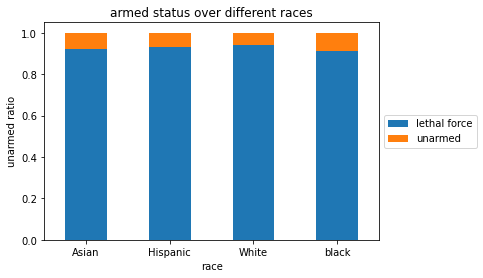

In [55]:
ax = new.plot(kind='bar', stacked=True, rot=0,
 title='armed status over different races')

ax.legend(("lethal force","unarmed"), loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel("unarmed ratio");